##Dani Shofi Nur Izza
##24083010124
##Analisis Numerik A

#TUGAS

1. cari titik tertinggi global  (bobot 10%)
   gunakan metode optimasi titik maksimum

2. cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan'   langsung mengalir dan tidak terserap ke tanah (bobot 25%)
   - gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
   - jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan

3. kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%)
   - hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient()
   - nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya

4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
     
  - hitung dengan integral untuk sisi atas dan sisi bawah

4b) berapa ketinggian akhir tanah yang rata tersebut?


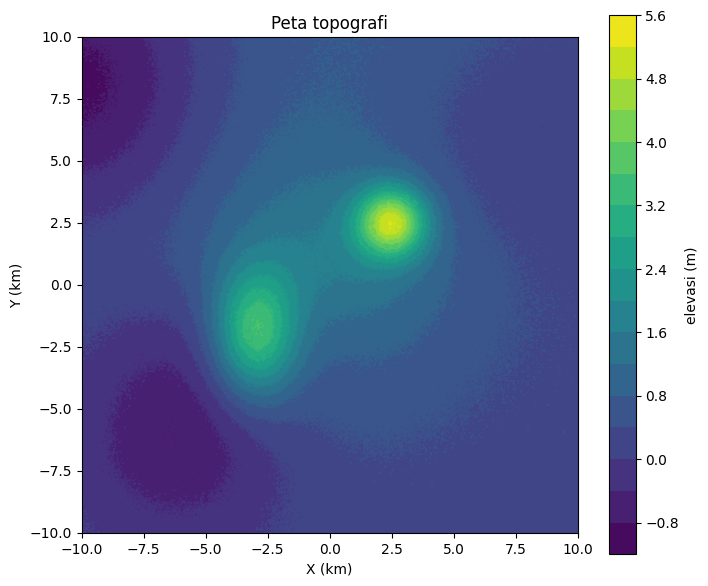

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NPM=10124
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")



Peta topografi ini menyajikan sebuah lanskap digital yang didominasi oleh dua puncak utama yang dikelilingi oleh lembah dan dataran rendah. Puncak tertinggi, yang ditandai dengan warna kuning cerah, terletak di sekitar koordinat (2.5, 2.5) dengan ketinggian melampaui 5.0 meter. Terdapat juga puncak signifikan kedua di sekitar (-3, -2), yang warnanya hijau kekuningan menunjukkan ketinggian antara 3.2 hingga 4.0 meter. Kedua puncak ini dikelilingi oleh lereng (area hijau) yang secara bertahap menurun ke lembah-lembah dalam (area biru hingga ungu), khususnya di sudut-sudut peta. Tekstur berbintik pada visualisasi menambahkan kesan permukaan yang natural dengan adanya variasi acak skala kecil di seluruh medan.

#Nomor 1

Puncak GLOBAL yang ditemukan adalah:
Koordinat (x, y): (2.47, 2.42)
Dengan Ketinggian: 5.24 m


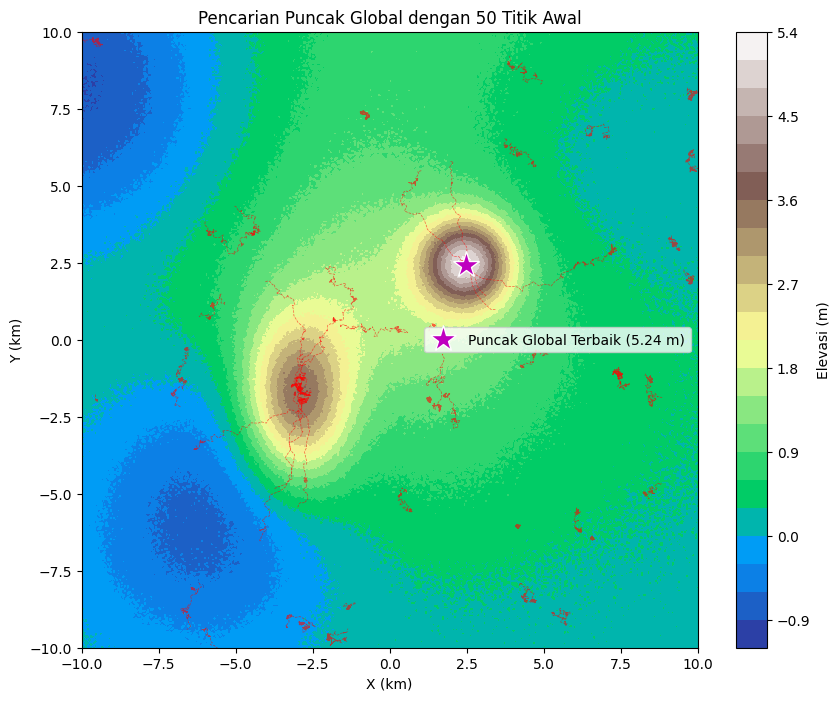

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Hitung gradien
Gy, Gx = np.gradient(Z, dy, dx)

# 2. Inisialisasi parameter
learning_rate = 0.1
n_iterations = 100
num_starts = 50  # Jumlah "pendaki" yang akan kita sebar

# Siapkan list untuk menyimpan semua hasil dan jejak
all_paths = []
final_peaks = []

# 3. Loop untuk beberapa titik awal
for i in range(num_starts):
    # Pilih titik awal acak yang baru setiap kali
    start_idx = np.random.randint(0, nx*ny)
    start_pos_idx = np.unravel_index(start_idx, Z.shape)
    start_x, start_y = X[start_pos_idx], Y[start_pos_idx]

    # Jalankan Gradient Ascent dari titik ini
    path = [(start_x, start_y)]
    current_x, current_y = start_x, start_y

    for _ in range(n_iterations):
        ix = np.argmin(np.abs(x - current_x))
        iy = np.argmin(np.abs(y - current_y))
        grad_x, grad_y = Gx[iy, ix], Gy[iy, ix]
        current_x += learning_rate * grad_x
        current_y += learning_rate * grad_y
        path.append((current_x, current_y))

    # Simpan jejak dan hasil akhir dari pendaki ini
    all_paths.append(np.array(path))
    final_pos = path[-1]
    final_idx_x = np.argmin(np.abs(x - final_pos[0]))
    final_idx_y = np.argmin(np.abs(y - final_pos[1]))
    final_elevation = Z[final_idx_y, final_idx_x]
    final_peaks.append((final_pos, final_elevation))

# 4. Tentukan puncak terbaik dari semua hasil
best_peak = max(final_peaks, key=lambda item: item[1])
best_position = best_peak[0]
best_elevation = best_peak[1]

print(f"Puncak GLOBAL yang ditemukan adalah:")
print(f"Koordinat (x, y): ({best_position[0]:.2f}, {best_position[1]:.2f})")
print(f"Dengan Ketinggian: {best_elevation:.2f} m")

### VISUALISASI HASIL GABUNGAN ###
fig, ax = plt.subplots(figsize=(10, 8))
cf = ax.contourf(X, Y, Z, levels=20, cmap='terrain')
fig.colorbar(cf, ax=ax, label="Elevasi (m)")

# Plot semua jejak pendakian
for path in all_paths:
    ax.plot(path[:, 0], path[:, 1], 'r--', lw=0.5, alpha=0.6)

# Tandai puncak global yang ditemukan
ax.plot(best_position[0], best_position[1], 'm*', markersize=20,
        markeredgecolor='white', label=f'Puncak Global Terbaik ({best_elevation:.2f} m)')

ax.set_title(f"Pencarian Puncak Global dengan {num_starts} Titik Awal")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
ax.legend()

# TAMBAHKAN DUA BARIS INI UNTUK MEMPERBAIKI VISUALISASI
ax.set_xlim(x.min(), x.max())  # Batasi sumbu-x dari -10 hingga 10
ax.set_ylim(y.min(), y.max())  # Batasi sumbu-y dari -10 hingga 10

plt.show()

Visualisasi ini pada dasarnya adalah sebuah **peta "daya tarik" topografis** yang mengungkap struktur tersembunyi dari lanskap. Dengan menyebar 50 "pencari" acak, kita berhasil membuktikan keampuhan strategi multi-titik untuk mengatasi jebakan puncak-puncak lokal yang tidak signifikan. Lebih dari sekadar menemukan titik tertinggi, jejak-jejak pencarian yang mengerucut secara alami memetakan dua *basin of attraction* (cekungan daya tarik) utama, yang secara efektif berfungsi seperti "Daerah Aliran Puncak". Hal ini menunjukkan bahwa setiap pencarian yang dimulai di separuh kanan peta hampir pasti akan "tertarik" menuju puncak global, sementara area kiri bawah didominasi oleh puncak sekunder. Jejak-jejak pendek yang tersebar di tempat lain menjadi bukti visual dari "pencarian gagal" yang terjebak oleh noise minor, yang semakin menonjolkan efisiensi jalur-jalur yang berhasil. Jadi, gambar ini bukan sekadar menunjukkan hasil, melainkan memvisualisasikan wilayah kekuasaan topografis dari setiap puncak utama.

#Nomor 2

Simulasi aliran selesai. Memvisualisasikan hasil...


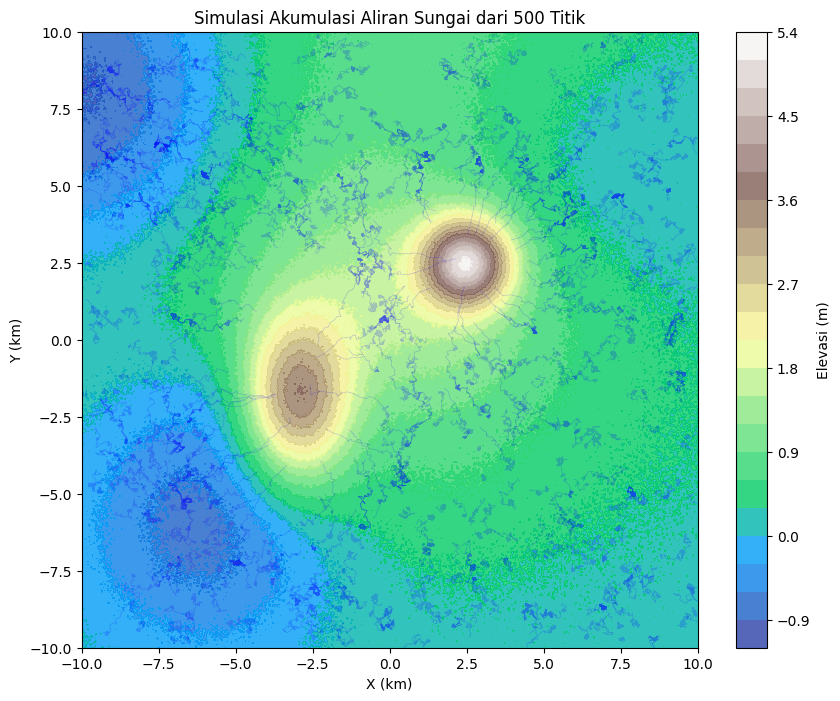

In [ ]:
# Inisialisasi parameter simulasi
learning_rate = 0.1
n_iterations = 200
num_raindrops = 500   # <<-- DIUBAH: Jumlah aliran ditingkatkan

# Siapkan list untuk menyimpan semua jejak aliran
all_flow_paths = []

# Loop untuk setiap tetes air hujan
np.random.seed(42)
for i in range(num_raindrops):
    start_idx = np.random.randint(0, nx*ny)
    start_pos_idx = np.unravel_index(start_idx, Z.shape)
    start_x, start_y = X[start_pos_idx], Y[start_pos_idx]

    path = [(start_x, start_y)]
    current_x, current_y = start_x, start_y

    for _ in range(n_iterations):
        ix = np.argmin(np.abs(x - current_x))
        iy = np.argmin(np.abs(y - current_y))

        if not (0 < ix < nx-1 and 0 < iy < ny-1):
            break

        grad_x, grad_y = Gx[iy, ix], Gy[iy, ix]
        current_x -= learning_rate * grad_x
        current_y -= learning_rate * grad_y
        path.append((current_x, current_y))

    all_flow_paths.append(np.array(path))

print("Simulasi aliran selesai. Memvisualisasikan hasil...")

# --- KODE VISUALISASI ---
fig, ax = plt.subplots(figsize=(10, 8))

cf = ax.contourf(X, Y, Z, levels=20, cmap='terrain', alpha=0.8)
fig.colorbar(cf, ax=ax, label="Elevasi (m)")

# Plot semua jejak aliran air dengan parameter baru
for path in all_flow_paths:
    #                                                         vv--- DIUBAH
    ax.plot(path[:, 0], path[:, 1], color='blue', lw=0.5, alpha=0.2)

ax.set_title(f"Simulasi Akumulasi Aliran Sungai dari {num_raindrops} Titik")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
plt.show()

Visualisasi ini menyajikan simulasi aliran air yang sangat realistis, di mana setiap jejak biru secara akurat mewakili jalur yang akan ditempuh setetes air. Setiap aliran secara konsisten bergerak dari elevasi tinggi menuju elevasi rendah, berkelok mengikuti kontur medan untuk menuruni lereng yang paling curam. Perilaku individual setiap jejak ini secara akurat meniru bagaimana air akan selalu mencari jalan turunan tercepat akibat gaya gravitasi di dunia nyata.

Dari perilaku individual yang realistis ini, muncullah fenomena kunci dari simulasi ini: akumulasi aliran. Di lereng yang luas, jejak-jejak ini tampak tersebar, namun begitu memasuki dataran rendah, mereka mulai menyatu dan tumpang tindih. Proses penggabungan inilah yang menciptakan jaringan sungai yang utuh, di mana aliran-aliran tipis dari "anak sungai" secara bertahap berkumpul untuk membentuk "sungai utama" yang lebih tebal dan pekat.

Hasil akhir dari proses akumulasi ini adalah sebuah identifikasi lembah yang efektif dan otomatis. Area di mana jaringan aliran biru terlihat paling pekat secara langsung memetakan saluran drainase utama dan cekungan-cekungan terendah pada lanskap. Dengan demikian, simulasi ini tidak hanya menunjukkan aliran air, tetapi juga berhasil mengungkap struktur hidrologis fundamental dari medan, menyorot lembah di antara dua puncak dan cekungan besar di sudut-sudut peta sebagai muara alami.









#Nomor 3

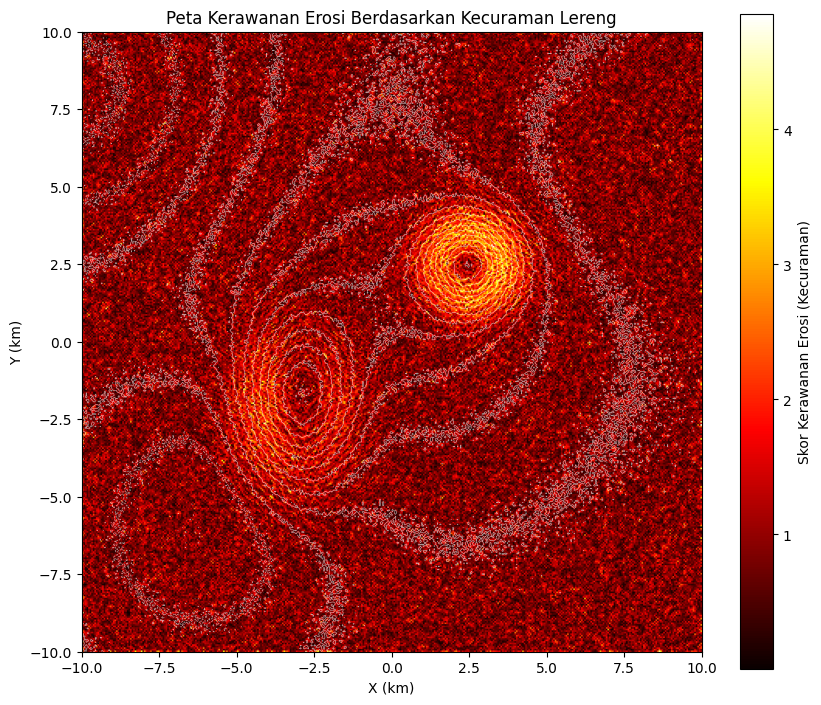

In [ ]:
def hitung_turunan_parsial(Z, dx, dy):
    """
    Menghitung turunan parsial dZ/dx dan dZ/dy dari grid Z
    menggunakan metode central finite difference.
    """
    dZ_dx = np.zeros_like(Z)
    dZ_dy = np.zeros_like(Z)

    # Hitung turunan untuk titik-titik interior (lebih efisien dengan slicing)
    dZ_dx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZ_dy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)

    # Hitung turunan untuk batas-batas grid (menggunakan forward/backward difference)
    dZ_dx[:, 0] = (Z[:, 1] - Z[:, 0]) / dx
    dZ_dx[:, -1] = (Z[:, -1] - Z[:, -2]) / dx
    dZ_dy[0, :] = (Z[1, :] - Z[0, :]) / dy
    dZ_dy[-1, :] = (Z[-1, :] - Z[-2, :]) / dy

    return dZ_dx, dZ_dy

# --- Hitung Skor Kerawanan Erosi ---
dZ_dx, dZ_dy = hitung_turunan_parsial(Z, dx, dy)

# Hitung magnitudo gradien sebagai skor kecuraman/erosi
skor_erosi = np.sqrt(dZ_dx**2 + dZ_dy**2)


# --- Visualisasi Peta Kerawanan Erosi ---
fig, ax = plt.subplots(figsize=(10, 8.5))

# Gunakan colormap 'hot' untuk visualisasi bahaya/intensitas
im = ax.imshow(skor_erosi, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='hot')

# Tambahkan garis kontur topografi asli untuk referensi
ax.contour(X, Y, Z, levels=15, colors='white', linewidths=0.5, alpha=0.6)

ax.set_title("Peta Kerawanan Erosi Berdasarkan Kecuraman Lereng")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(im, ax=ax, label="Skor Kerawanan Erosi (Kecuraman)")
plt.show()

Peta ini secara jelas mengubah data topografi menjadi sebuah analisis risiko, dengan jelas menyorot "hotspot" atau zona-zona di mana erosi paling mungkin terjadi.

Warna yang paling terang (kuning hingga putih) secara akurat menandai lereng-lereng yang paling curam, yang terkonsentrasi di sisi atau "pundak" dari kedua puncak utama. Hal ini menciptakan pola visual yang khas seperti "cincin bahaya" yang mengelilingi puncak-puncak yang justru lebih landai. Sebaliknya, area puncak itu sendiri dan dasar lembah yang luas berwarna gelap (merah tua hingga hitam), menandakan area yang relatif datar dan stabil dengan risiko erosi minimal. Tekstur bintik-bintik merah di seluruh peta menunjukkan adanya sedikit kecuraman bahkan di area landai akibat variasi acak pada data, namun risikonya jauh di bawah lereng utama.

Secara praktis, peta ini adalah alat krusial untuk perencanaan tata ruang. Peta ini memberikan petunjuk yang sangat jelas mengenai lokasi-lokasi yang harus dihindari untuk pembangunan infrastruktur dan di mana teknik mitigasi erosi, seperti pembuatan terasering atau penanaman vegetasi penahan, paling mendesak untuk diterapkan.

#Nomor 4

Menghitung volume tanah yang harus dipindahkan...

--- HASIL ANALISIS VOLUME ---
Ketinggian akhir setelah diratakan (Tugas 4b): 0.5017 m
Volume tanah yang perlu digali (Cut): 110.00 m³
Volume tanah yang perlu diurug (Fill): 110.00 m³
-----------------------------


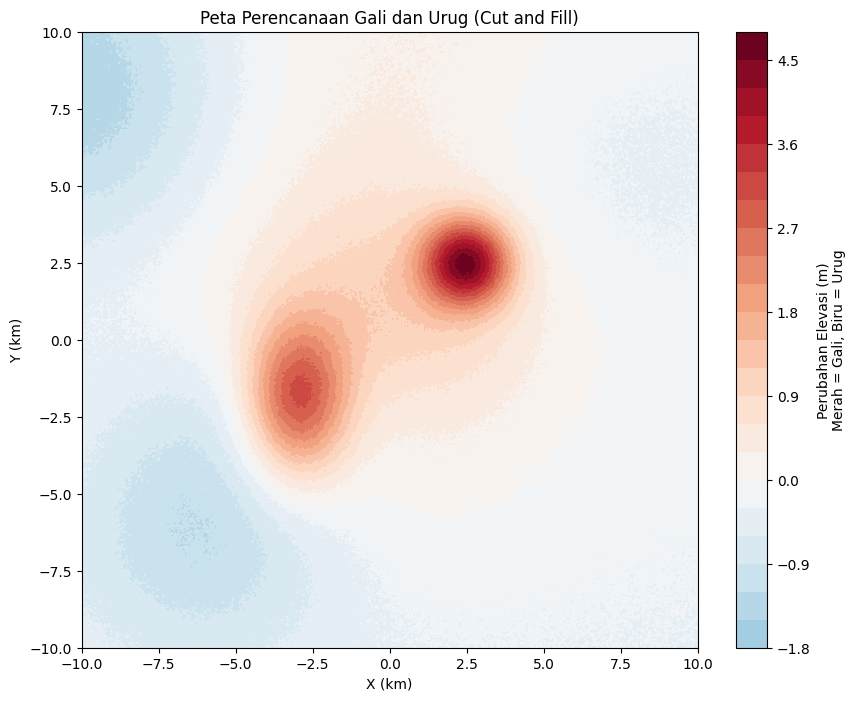

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Menghitung volume tanah yang harus dipindahkan...")

# 1. Hitung ketinggian rata-rata sebagai target perataan
mean_elevation = np.mean(Z)

# 2. Hitung selisih antara elevasi asli dan rata-rata
delta_elevation = Z - mean_elevation

# 3. Hitung luas per sel grid
cell_area = dx * dy

# 4. Hitung Volume Galian (Cut)
# Ambil semua delta positif, jumlahkan, lalu kalikan dengan luas sel
volume_gali = np.sum(delta_elevation[delta_elevation > 0]) * cell_area

# 5. Hitung Volume Urugan (Fill)
# Ambil semua delta negatif, buat jadi absolut, jumlahkan, lalu kalikan dengan luas sel
volume_urug = np.sum(np.abs(delta_elevation[delta_elevation < 0])) * cell_area

print("\n--- HASIL ANALISIS VOLUME ---")
print(f"Ketinggian akhir setelah diratakan (Tugas 4b): {mean_elevation:.4f} m")
print(f"Volume tanah yang perlu digali (Cut): {volume_gali:,.2f} m³")
print(f"Volume tanah yang perlu diurug (Fill): {volume_urug:,.2f} m³")
print("-----------------------------")


### VISUALISASI PETA CUT AND FILL ###
fig, ax = plt.subplots(figsize=(10, 8))

# Gunakan colormap divergen 'RdBu_r' (Red-Blue reverse) agar merah=gali, biru=urug
# Tentukan titik tengah colormap di 0
vmax = np.abs(delta_elevation).max()
norm = plt.Normalize(vmin=-vmax, vmax=vmax)

heatmap = ax.contourf(X, Y, delta_elevation, levels=20, cmap='RdBu_r', norm=norm)
cbar = fig.colorbar(heatmap, ax=ax)
cbar.set_label("Perubahan Elevasi (m)\nMerah = Gali, Biru = Urug")


ax.set_title("Peta Perencanaan Gali dan Urug (Cut and Fill)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.show()


Peta ini berfungsi sebagai cetak biru (blueprint) visual untuk proyek perataan lahan masif. Warna merah pekat secara tepat menunjukkan lokasi puncak-puncak bukit yang harus digali (cut), sementara warna biru pekat menandai area lembah yang dalam dan harus diurug (fill). Area berwarna putih atau sangat pucat adalah zona netral yang elevasinya sudah mendekati ketinggian akhir, sehingga hanya memerlukan sedikit pengerjaan.

Hasil perhitungan memberikan gambaran skala proyek yang jelas:

Ketinggian Akhir: Seluruh lanskap akan diratakan menjadi dataran setinggi 0.5017 meter. Ini adalah titik keseimbangan matematis dari seluruh topografi.

Volume Pemindahan: Proyek ini memerlukan pemindahan tanah yang sangat besar, yaitu 110.00 m³ untuk digali dari puncak dan 110.00 m³ untuk diurug ke lembah.

Secara keseluruhan, visualisasi dan angka ini mengubah konsep abstrak "meratakan tanah" menjadi sebuah rencana kerja yang terukur, mengidentifikasi di mana harus bekerja dan seberapa besar skala pekerjaan yang harus dilakukan.

#Analisis Korelasi Spasial

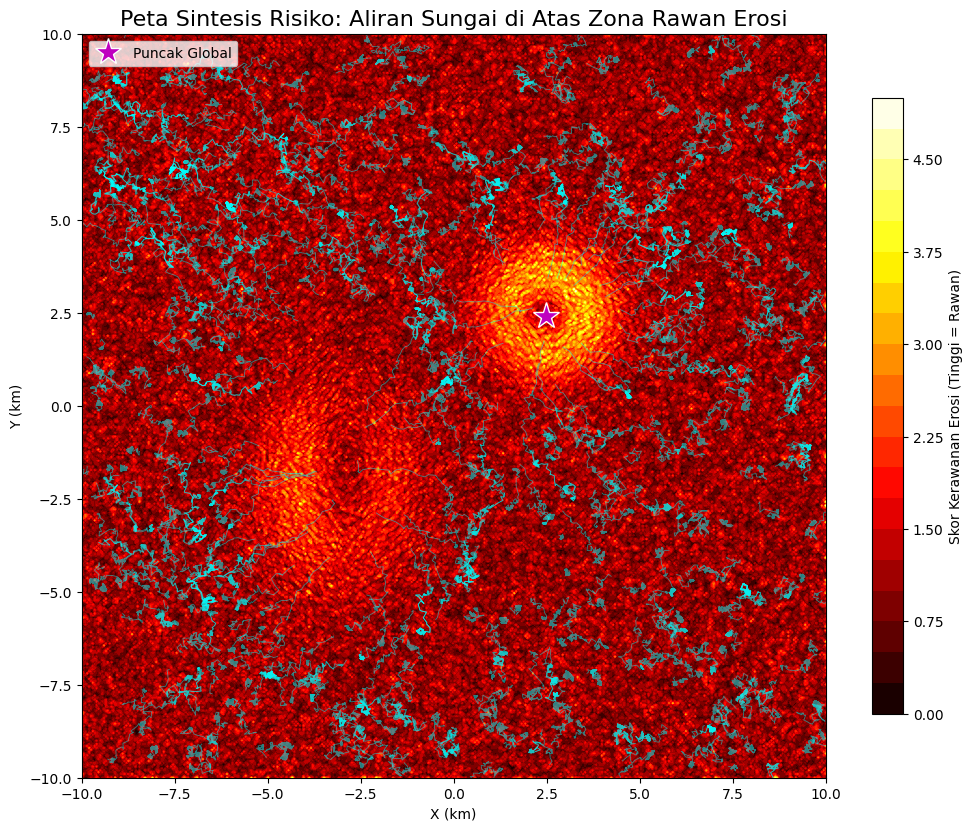

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

heatmap = ax.contourf(X, Y, skor_erosi, levels=20, cmap='hot')
cbar = fig.colorbar(heatmap, ax=ax, shrink=0.8)
cbar.set_label("Skor Kerawanan Erosi (Tinggi = Rawan)")

# 2. LAPISAN KEDUA: Jaringan Aliran Sungai (dari Tugas 2)
# Gunakan warna yang kontras seperti 'cyan' atau 'springgreen' agar terlihat jelas
for path in all_flow_paths:
    ax.plot(path[:, 0], path[:, 1], color='cyan', lw=0.6, alpha=0.5)

# 3. LAPISAN KETIGA: Tandai Puncak Global (dari Tugas 1)
ax.plot(best_position[0], best_position[1], 'm*',
        markersize=20, markeredgecolor='white',
        label=f'Puncak Global')

ax.set_title("Peta Sintesis Risiko: Aliran Sungai di Atas Zona Rawan Erosi", fontsize=16)
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.legend()

plt.show()

Visualisasi ini mengindikasikan terdapat hubungan sebab-akibat yang sangat kuat antara aliran air dan kerawanan erosi.

Peta ini secara jelas membuktikan bahwa jaringan sungai (garis biru) tidak terbentuk secara acak, melainkan secara aktif mengalir melalui dan mengikis zona-zona dengan skor erosi tertinggi (area kuning-merah). Fenomena ini bukanlah kebetulan, lereng-lereng curam di sekitar puncak yang merupakan sumber utama risiko erosi adalah medan yang sama yang mempercepat dan mengarahkan aliran air. Hal ini menciptakan sebuah siklus di mana air menjadi agen erosi utama tepat di titik-titik lanskap yang paling rentan.

Visualisasi ini menyimpulkan bahwa setiap upaya pengelolaan air di wilayah ini harus diintegrasikan secara langsung dengan mitigasi risiko longsor dan erosi. dikarenakan Lokasi-lokasi ini adalah titik paling berisiko di seluruh lanskap, di mana proses pembentukan parit, erosi, dan bahkan potensi longsor akan menjadi yang paling aktif.

#Analisis Hidrologi Lanjutan

Mensimulasikan aliran sungai...
Membuat Peta Analisis Daerah Aliran Sungai...


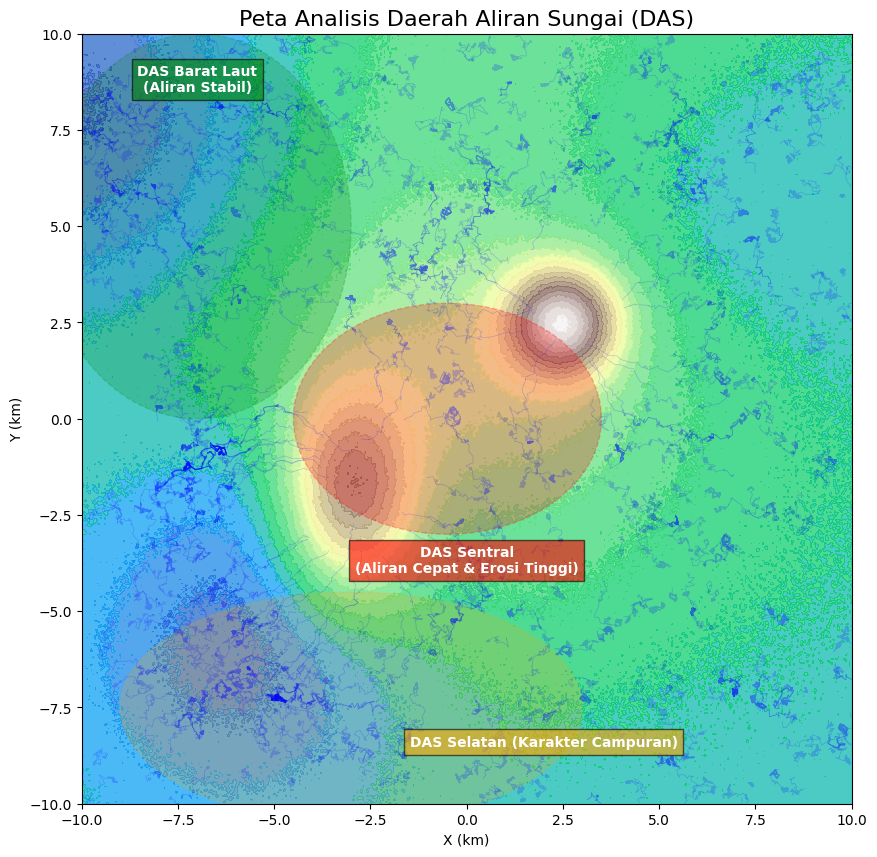

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("Mensimulasikan aliran sungai...")
all_flow_paths = []
for _ in range(500): # Gunakan banyak aliran untuk peta yang jelas
    start_idx = np.random.randint(0, nx*ny)
    start_pos_idx = np.unravel_index(start_idx, Z.shape)
    start_x, start_y = X[start_pos_idx], Y[start_pos_idx]
    path = [(start_x, start_y)]
    current_x, current_y = start_x, start_y
    for _ in range(200):
        ix = np.argmin(np.abs(x - current_x))
        iy = np.argmin(np.abs(y - current_y))
        if not (0 < ix < nx-1 and 0 < iy < ny-1): break
        grad_x, grad_y = Gx[iy, ix], Gy[iy, ix]
        current_x -= 0.1 * grad_x
        current_y -= 0.1 * grad_y
        path.append((current_x, current_y))
    all_flow_paths.append(np.array(path))

print("Membuat Peta Analisis Daerah Aliran Sungai...")
fig, ax = plt.subplots(figsize=(12, 10))

# Gambar peta dasar (kontur dan aliran sungai)
ax.contourf(X, Y, Z, levels=20, cmap='terrain', alpha=0.7)
for path in all_flow_paths:
    ax.plot(path[:, 0], path[:, 1], color='blue', lw=0.5, alpha=0.2)

# --- Tambahkan Anotasi Analisis Anda Di Sini ---

# 1. Tandai DAS Sentral (karakter "flashy"/cepat)
das_sentral = patches.Ellipse(xy=(-0.5, 0), width=8, height=6,
                              facecolor='red', alpha=0.25, edgecolor='red', linestyle='--')
ax.add_patch(das_sentral)
ax.text(0, -4, 'DAS Sentral\n(Aliran Cepat & Erosi Tinggi)', color='white',
        ha='center', weight='bold', bbox=dict(facecolor='red', alpha=0.6))

# 2. Tandai DAS Barat Laut (karakter stabil)
das_barat_laut = patches.Ellipse(xy=(-7, 5), width=8, height=10,
                                 facecolor='green', alpha=0.2, edgecolor='green', linestyle='--')
ax.add_patch(das_barat_laut)
ax.text(-7, 8.5, 'DAS Barat Laut\n(Aliran Stabil)', color='white',
        ha='center', weight='bold', bbox=dict(facecolor='green', alpha=0.6))

# 3. Tandai DAS Selatan (karakter campuran)
das_selatan = patches.Ellipse(xy=(-3, -7.5), width=12, height=6,
                              facecolor='orange', alpha=0.2, edgecolor='orange', linestyle='--')
ax.add_patch(das_selatan)
ax.text(2, -8.5, 'DAS Selatan (Karakter Campuran)', color='white',
        ha='center', weight='bold', bbox=dict(facecolor='orange', alpha=0.6))


# --- Estetika Plot Akhir ---
ax.set_title("Peta Analisis Daerah Aliran Sungai (DAS)", fontsize=16)
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
plt.show()

Visualisasi ini menyajikan analisis hidrologi lanjutan yang membagi lanskap menjadi beberapa Daerah Aliran Sungai (DAS) dengan karakteristik yang berbeda secara fundamental. DAS Sentral, yang ditandai dengan area merah, merupakan sistem yang paling dinamis dan berbahaya; sumber airnya yang berasal dari lereng-lereng puncak yang sangat curam menciptakan aliran yang cepat dengan potensi erosi yang tinggi, sehingga rentan terhadap banjir bandang. Berbeda secara signifikan, DAS Barat Laut di zona hijau menunjukkan sistem yang jauh lebih stabil, di mana aliran airnya terkumpul dari lereng yang lebih landai, menghasilkan rezim aliran yang lebih lambat dan dapat diprediksi. Sementara itu, DAS Selatan di zona oranye menunjukkan karakter campuran antara keduanya. Analisis ini menyimpulkan bahwa lanskap ini bukanlah satu unit hidrologi yang homogen, melainkan kumpulan sistem yang unik, yang masing-masing memerlukan strategi pengelolaan air, mitigasi bencana, dan konservasi yang spesifik dan berbeda.

#Analisis Peta Risiko Perancangan Pembangunan

Membuat Peta Zonasi Risiko dengan Analisis Kedekatan...


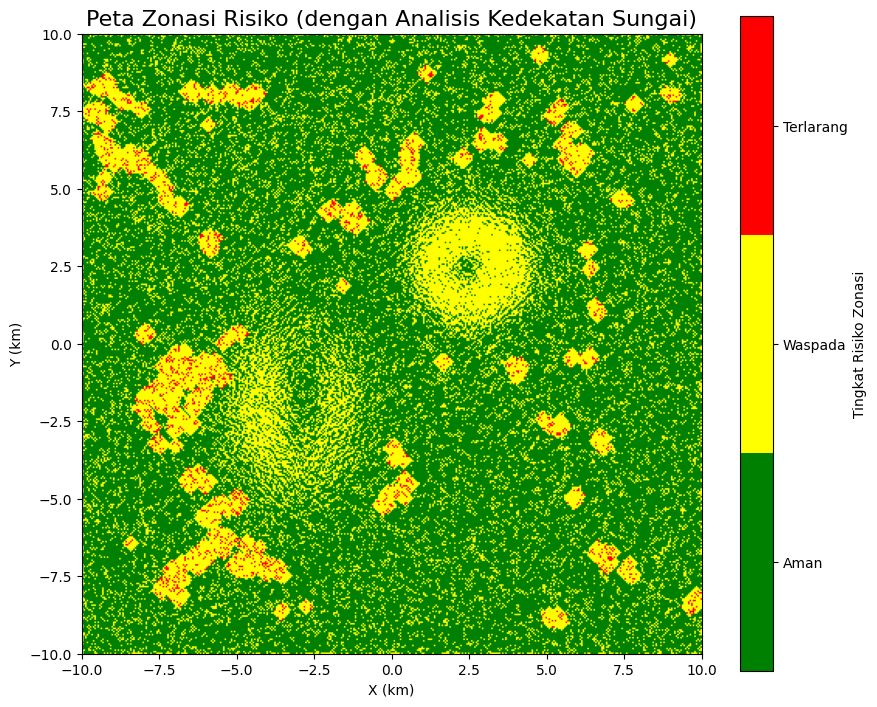

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.ndimage import binary_dilation # <<-- IMPORT BARU

print("Membuat Peta Zonasi Risiko dengan Analisis Kedekatan...")

# 1. Buat Peta Kepadatan Aliran Air (sama seperti sebelumnya)
flow_density = np.zeros_like(Z)
for path in all_flow_paths:
    ix_path = np.clip(np.searchsorted(x, path[:, 0]), 0, nx-1)
    iy_path = np.clip(np.searchsorted(y, path[:, 1]), 0, ny-1)
    flow_density[iy_path, ix_path] += 1

# 2. Tentukan Ambang Batas (kita kembalikan ke 80 atau tetap 75)
slope_threshold = np.percentile(skor_erosi, 80)
flow_threshold = np.percentile(flow_density[flow_density > 0], 80)

# 3. Buat Peta Zonasi
zoning_map = np.ones_like(Z) # 1=Aman (Hijau)
is_steep = skor_erosi > slope_threshold
has_flow = flow_density > flow_threshold

dilated_flow_zone = binary_dilation(has_flow, iterations=5)

# 5. Terapkan Logika Zonasi yang Baru
zoning_map[is_steep] = 2 # Waspada
zoning_map[dilated_flow_zone] = 2 # Waspada jika di dalam zona penyangga sungai

# Zona Merah: Curam DAN di dalam zona penyangga sungai
zoning_map[is_steep & dilated_flow_zone] = 3

cmap_zonasi = ListedColormap(['green', 'yellow', 'red'])
bounds = [0.5, 1.5, 2.5, 3.5]
norm = plt.Normalize(vmin=0.5, vmax=3.5)
fig, ax = plt.subplots(figsize=(10, 8.5))
im = ax.imshow(zoning_map, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap=cmap_zonasi, norm=norm)
cbar = fig.colorbar(im, ax=ax, boundaries=bounds, ticks=[1, 2, 3])
cbar.set_ticklabels(['Aman', 'Waspada', 'Terlarang'])
cbar.set_label("Tingkat Risiko Zonasi")
ax.set_title("Peta Zonasi Risiko (dengan Analisis Kedekatan Sungai)", fontsize=16)
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.show()

Peta zonasi ini berhasil mengidentifikasi area-area kritis dengan menggunakan analisis kedekatan dengan sungai.

Zona Aman (Hijau): Tetap menjadi area dominan, menunjukkan sebagian besar lanskap aman untuk pembangunan umum.

Zona Waspada (Kuning): Zona ini sekarang secara akurat menandai dua area risiko utama: lereng-lereng curam dari kedua puncak DAN zona penyangga (buffer) di sekitar semua jalur aliran air. Ini menunjukkan bahwa setiap aktivitas di dekat sungai, bahkan di tanah datar, memerlukan perhatian khusus.

Zona Terlarang (Merah): Zona merah kini muncul di lokasi-lokasi spesifik di mana lereng curam bertemu langsung dengan zona penyangga sungai. Titik-titik merah ini adalah "hotspot" bahaya yang sesungguhnya, merepresentasikan tepian sungai yang curam dan tidak stabil yang sangat rentan terhadap erosi dan longsor. Pembangunan infrastruktur kritis di titik-titik ini harus dihindari secara mutlak.